<h2>Solutions MIP Ex. 4</h2>

<strong>Remark about color space (BGR vs RGB):</strong>
Some of you have fed images into the OpenCV functions loaded as RGB images instead of BGR.
Please remember that OpenCV expects a BGR image, but then again Matplotlib expects images loaded as RGB.

Please have a look on how to deal with this issue here: https://www.scivision.co/numpy-image-bgr-to-rgb/ and here: http://www.bogotobogo.com/python/OpenCV_Python/python_opencv3_matplotlib_rgb_brg_image_load_display_save.php

Always bear in mind that loading an image in the wrong color space may eventually lead to wrong results. If in doubt, always check numeric pixel values or the image color histogram with, e.g., a plain red image.

<strong style="color: red">Programming Task:</strong>
Implement this very simple approach for binarizing the image cell.png. Do not use any special functions, but follow the explained approach. Which threshold value works best?

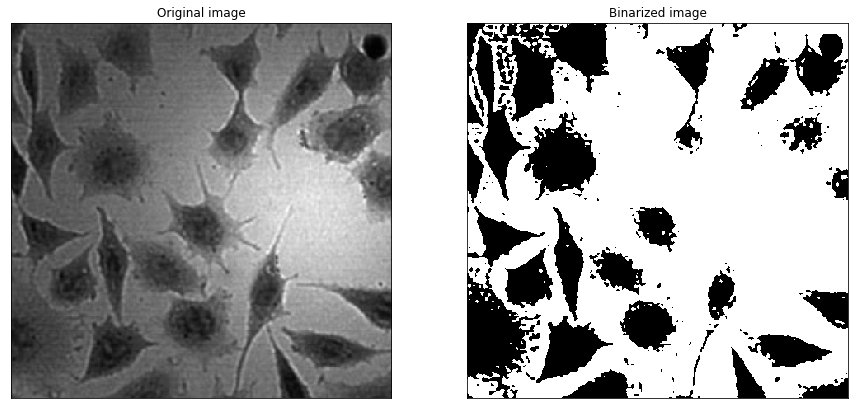

In [22]:
%matplotlib inline
import cv2
import matplotlib.image as mpimg
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pylab as pylab

pylab.rcParams['figure.figsize'] = (15.0, 15.0)
img = cv2.imread('cell.png',0)

thresh, upper, lower = 83, 255, -77
cimg = np.where(img > thresh, upper, lower)

plt.subplot(121), plt.imshow(img, cmap = 'gray')
plt.title('Original image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cimg, cmap = 'gray')
plt.title('Binarized image'), plt.xticks([]), plt.yticks([])
plt.show()

<strong style="color: red">Programming Task:</strong> Using OpenCV's <code>threshold()</code> function, implement the same procedure again. Lookup OpenCV's documentation to find out about its arguments.

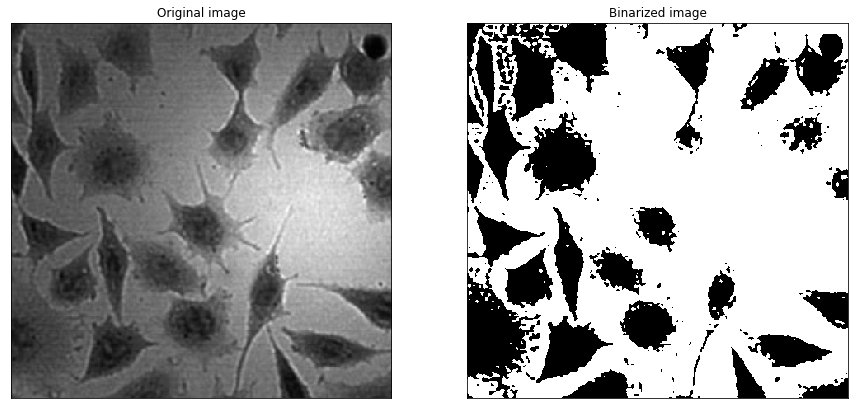

In [47]:
%matplotlib inline
import cv2
import matplotlib.image as mpimg
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pylab as pylab

pylab.rcParams['figure.figsize'] = (15.0, 15.0)
img = cv2.imread('cell.png',0)

ret, cimg = cv2.threshold(img, 83, 255, cv2.THRESH_BINARY)

plt.subplot(121), plt.imshow(img, cmap = 'gray')
plt.title('Original image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cimg, cmap = 'gray')
plt.title('Binarized image'), plt.xticks([]), plt.yticks([])
plt.show()

<strong style="color: red">Programming Task:</strong> Implement Otsu's method. Do not use functions provided by OpenCV.

A solution can be <a href="https://www.meccanismocomplesso.org/en/opencv-python-otsu-binarization-thresholding/">found here.</a>

In [28]:
import cv2
import numpy as np
 
img = cv2.imread('cell.png',0)

# find normalized_histogram, and its cumulative distribution function
hist = cv2.calcHist([img],[0],None,[256],[0,256])
hist_norm = hist.ravel()/hist.max()
Q = hist_norm.cumsum()
bins = np.arange(256)
fn_min = np.inf
thresh = -1
for i in range(1,256):
    p1,p2 = np.hsplit(hist_norm,[i]) # probabilities
    q1,q2 = Q[i],Q[255]-Q[i] # cum sum of classes
    if q1 == 0:
        q1 = 0.00000001
    if q2 == 0:
        q2 = 0.00000001
    b1,b2 = np.hsplit(bins,[i]) # weights
    # finding means and variances
    m1,m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2
    v1,v2 = np.sum(((b1-m1)**2)*p1)/q1,np.sum(((b2-m2)**2)*p2)/q2
    # calculates the minimization function
    fn = v1*q1 + v2*q2
    if fn < fn_min:
        fn_min = fn
    thresh = i
# find otsu's threshold value with OpenCV function
ret, otsu = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
thresh
ret

118.0

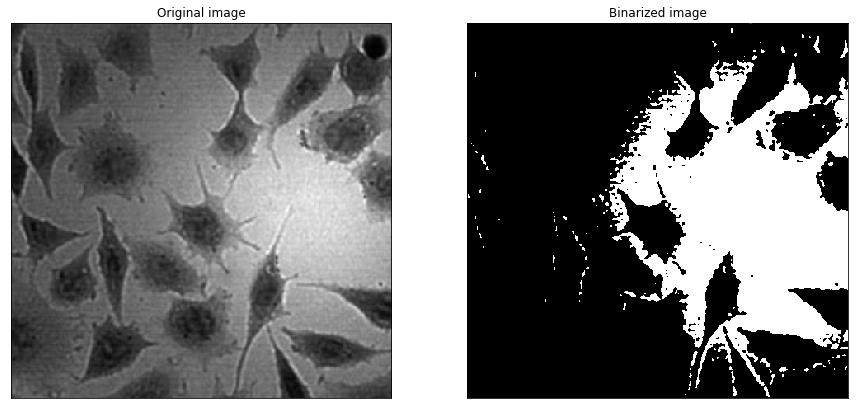

118.0

In [29]:
%matplotlib inline
import cv2
import matplotlib.image as mpimg
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pylab as pylab

pylab.rcParams['figure.figsize'] = (15.0, 15.0)
img = cv2.imread('cell.png',0)

ret, cimg = cv2.threshold(img, 1, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.subplot(121), plt.imshow(img, cmap = 'gray')
plt.title('Original image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cimg, cmap = 'gray')
plt.title('Binarized image'), plt.xticks([]), plt.yticks([])
plt.show()

ret

<strong style="color: red">Programming Task:</strong> Apply CLAHE to the image prior to binarization. How does the result compare now to applying binarization without contrast improvement?

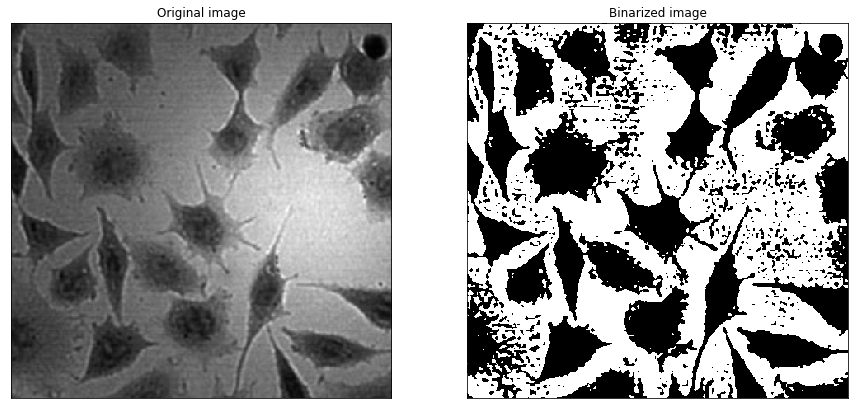

In [52]:
%matplotlib inline
import cv2
import matplotlib.image as mpimg
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pylab as pylab

pylab.rcParams['figure.figsize'] = (15.0, 15.0)
img = cv2.imread('cell.png',0)

clahe = cv2.createCLAHE()
cimg = clahe.apply(img)
ret, cimg = cv2.threshold(cimg, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.subplot(121), plt.imshow(img, cmap = 'gray')
plt.title('Original image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cimg, cmap = 'gray')
plt.title('Binarized image'), plt.xticks([]), plt.yticks([])
plt.show()

<strong style="color: red">Programming Task:</strong> Apply the <code>adaptiveThreshold()</code> function to the cell.png image. Your result should look similar to Figure 1h.

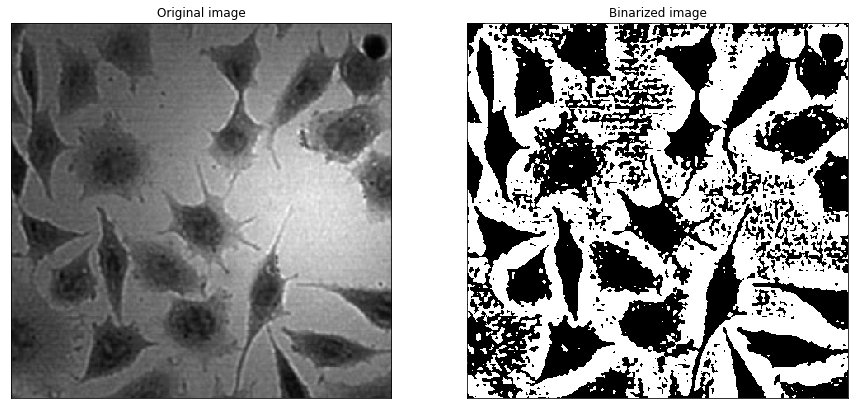

In [53]:
%matplotlib inline
import cv2
import matplotlib.image as mpimg
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pylab as pylab

pylab.rcParams['figure.figsize'] = (15.0, 15.0)
img = cv2.imread('cell.png',0)

cimg = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 55, 0)

plt.subplot(121), plt.imshow(img, cmap = 'gray')
plt.title('Original image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cimg, cmap = 'gray')
plt.title('Binarized image'), plt.xticks([]), plt.yticks([])
plt.show()

<strong style="color: red">Programming Task:</strong> Adapt the first method to allow multiple thresholds and segment the ct_scan.png image. Your result should look similar to Figure 2b, depending on the number of chosen thresholds and parameters.

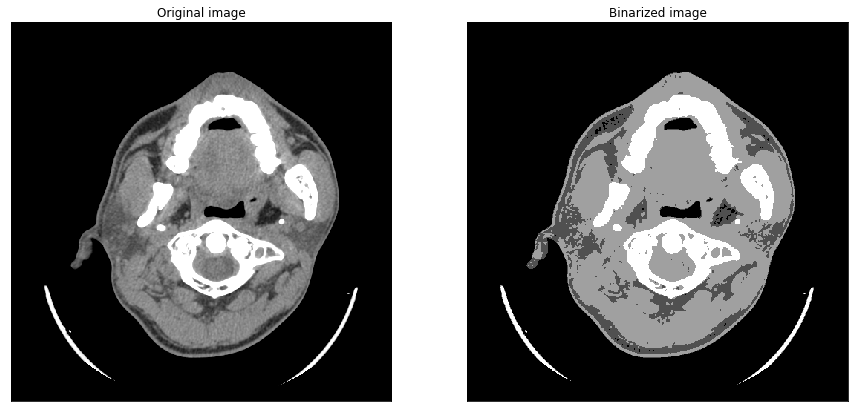

In [61]:
%matplotlib inline
import cv2
import matplotlib.image as mpimg
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pylab as pylab

pylab.rcParams['figure.figsize'] = (15.0, 15.0)
img = cv2.imread('ct_scan.png', 0)

h,w = img.shape
cimg = np.zeros((h,w), np.uint8)

thresh1,thresh2,thresh3 = 35,100,190
height, width = img.shape
for i in range (0,height):
    for j in range (0,width):
        if img[i,j] < thresh1:
            cimg[i,j] = 0
        elif img[i,j] < thresh2:
            cimg[i,j] = 80
        elif img[i,j] < thresh3:
            cimg[i,j] = 160
        else:
            cimg[i,j] = 255

plt.subplot(121), plt.imshow(img, cmap = 'gray')
plt.title('Original image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cimg, cmap = 'gray')
plt.title('Binarized image'), plt.xticks([]), plt.yticks([])
plt.show()

<strong style="color:red">Programming Task:</strong> Implement K-means segmentation with OpenCV. Apply your implementation to the wound.jpg image.

A nice explanation of K-means can be found here: <a href="https://team.inria.fr/steep/files/2015/03/tp51.pdf">K-means tutorial from INRIA</a>

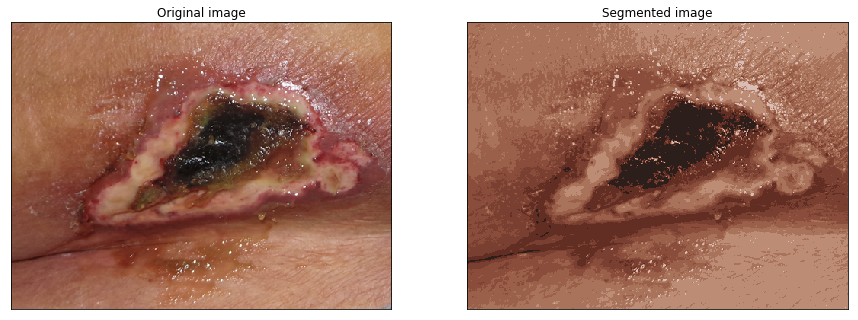

In [15]:
%matplotlib inline
import cv2
import matplotlib.image as mpimg
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pylab as pylab

pylab.rcParams['figure.figsize'] = (15.0, 15.0)
img = cv2.imread('wound.jpg')

# Convert to signed 16-bit integer to allow values outside of the (0,255) range
cimg = np.int16(img)  

N = 10
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, N, 1.0)
flag = cv2.KMEANS_RANDOM_CENTERS
cimg = cimg.reshape((img.shape[0] * img.shape[1], 3))
cimg = np.float32(cimg)
K = 8
ret,label,center = cv2.kmeans(cimg, K, None, criteria, 10, flag)
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

# Convert back to uint8 values
cimg = np.uint8(cimg)

plt.subplot(121), plt.imshow(img[:,:,::-1])
plt.title('Original image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(res2[:,:,::-1])
plt.title('Segmented image'), plt.xticks([]), plt.yticks([])
plt.show()

<strong style="color: red">Programming Task: </strong> Apply the method to wound.jpg.  Make use of the <code><a href="https://docs.opencv.org/3.4.1/d4/d86/group__imgproc__filter.html#ga9fabdce9543bd602445f5db3827e4cc0">pyrMeanShiftFiltering()</a></code> function. Consider using Gaussian smoothing prior to mean-shift segmentation. Pick meaningful parameters.

<strong>Remark:</strong> At every pixel $(X,Y)$ of the input image (or down-sized input image, see below) the function executes meanshift iterations, that is, the pixel $(X,Y)$ neighborhood in the joint space-color hyperspace is considered:
$$ (x,y): X- \texttt{sp} \le x \le X+ \texttt{sp} , Y- \texttt{sp} \le y \le Y+ \texttt{sp} , ||(R,G,B)-(r,g,b)|| \le \texttt{sr} $$

where $(R,G,B)$ and $(r,g,b)$ are the vectors of color components at $(X,Y)$ and $(x,y)$, respectively (though, the algorithm does not depend on the color space used, so any 3-component color space can be used instead).

You can watch these two YouTube videos from Udacity for an in-detail explanation on how Mean-shift works:
https://www.youtube.com/watch?v=Evc53OaDTFc, https://www.youtube.com/watch?v=yhz8Fm0ymm8. 
A short explanation is given also in this <a href="https://stackoverflow.com/questions/4831813/image-segmentation-using-mean-shift-explained">StackOverflow Q&amp;A</a>.

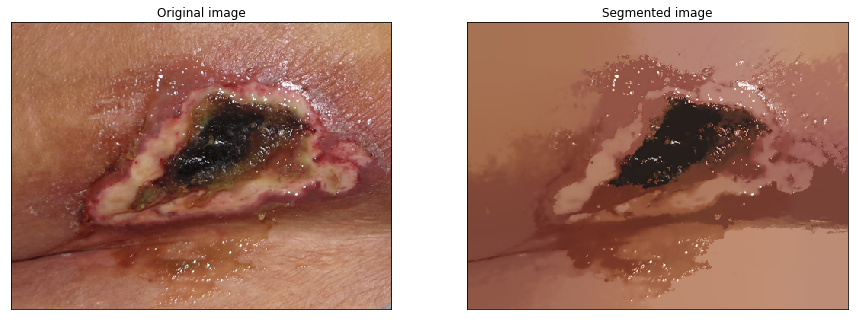

In [42]:
%matplotlib inline
import cv2
import matplotlib.image as mpimg
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pylab as pylab

pylab.rcParams['figure.figsize'] = (15.0, 15.0)
img = cv2.imread('wound.jpg')

N = 10
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, N, 1.0)
sp = 50
sr = 30
cimg = cv2.pyrMeanShiftFiltering(img, sp, sr)

plt.subplot(121), plt.imshow(img[:,:,::-1])
plt.title('Original image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cimg[:,:,::-1])
plt.title('Segmented image'), plt.xticks([]), plt.yticks([])
plt.show()

<strong style="color: red">Programming Task</strong>: Using OpenCV's <code>Canny()</code> function, apply the method to the ct_scan.png image. Experiment with different parameters and tune to optimum performance.

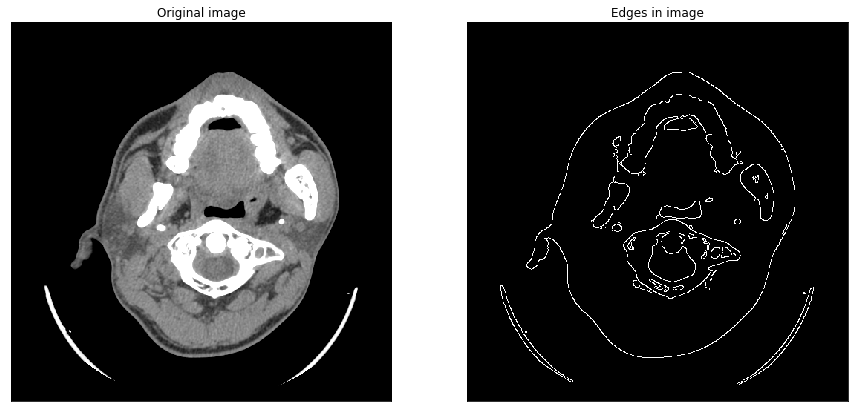

In [68]:
%matplotlib inline
import cv2
import matplotlib.image as mpimg
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pylab as pylab

pylab.rcParams['figure.figsize'] = (15.0, 15.0)
img = cv2.imread('ct_scan.png',0)

cimg = cv2.Canny(img, 100, 600)

plt.subplot(121), plt.imshow(img, cmap = 'gray')
plt.title('Original image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cimg, cmap = 'gray')
plt.title('Edges in image'), plt.xticks([]), plt.yticks([])
plt.show()

<strong style="color: red">Programming Task</strong>: Using OpenCV's <code>Sobel()</code> function, apply the method to the ct_scan.png image. Note that you will need to apply it twice: for the gradients on both directions $x$ and $y$. Your result should look similar to Figure 5c.

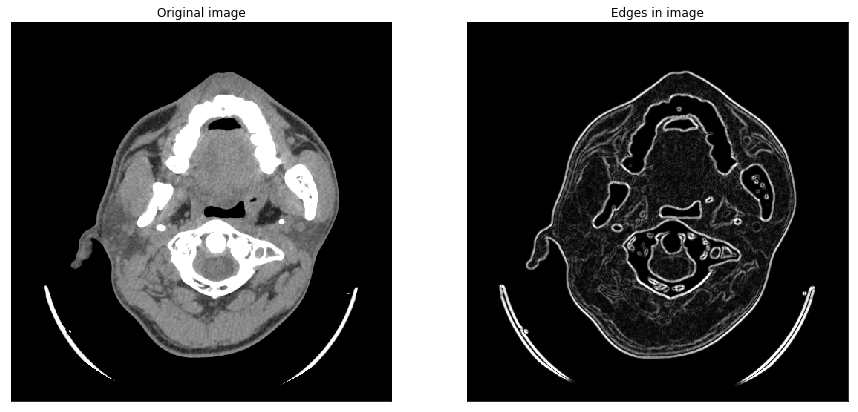

In [19]:
%matplotlib inline
import cv2
import matplotlib.image as mpimg
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pylab as pylab

pylab.rcParams['figure.figsize'] = (15.0, 15.0)
img = cv2.imread('ct_scan.png',0)

# Convert to signed 16-bit integer to allow values outside of the (0,255) range
cimg = np.int16(img)  

# YOUR CODE HERE

# remove noise
cimg = cv2.GaussianBlur(img, (3,3), 0)

# compute gradients
ddepth = cv2.CV_64F # grayscale flag
gradx = cv2.Sobel(cimg, ddepth, 1, 0)
grady = cv2.Sobel(cimg, ddepth, 0, 1)

# add both gradients
abs_gradx = cv2.convertScaleAbs(gradx)
abs_grady = cv2.convertScaleAbs(grady)
cimg = cv2.addWeighted( abs_gradx, 0.5, abs_grady, 0.5, 0);

# END OF YOUR CODE

# Convert back to uint8 values
cimg = np.uint8(cimg)

plt.subplot(121), plt.imshow(img, cmap = 'gray')
plt.title('Original image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cimg, cmap = 'gray')
plt.title('Edges in image'), plt.xticks([]), plt.yticks([])
plt.show()



<strong style="color: red">Programming Task</strong>: Using OpenCV's <code>grabCut()</code> function, apply the grabCut method to the tooth.jpg and melanoma.jpg images. Separate the tooth and the mole from its backgrounds. Select values fo the bounding rectangle and the number of iterations to allow optimum segmentation. Your results should look similar to those presented in Figure 6.

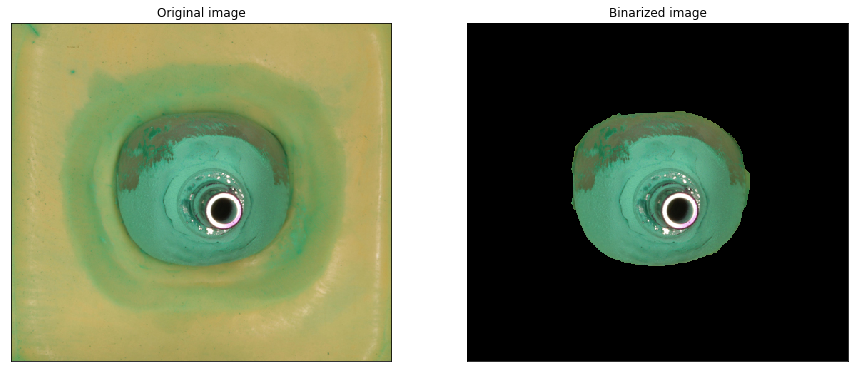

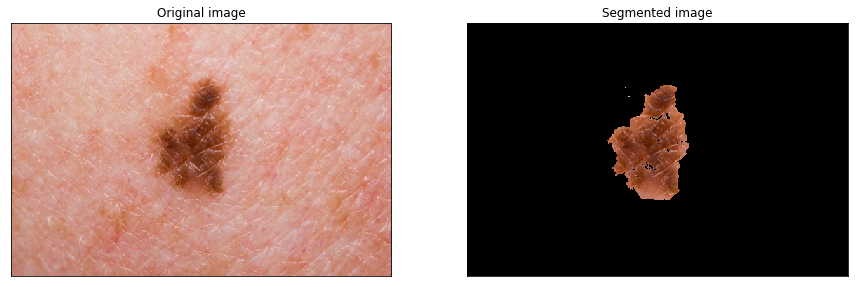

In [69]:
%matplotlib inline
import cv2
import matplotlib.image as mpimg
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pylab as pylab

pylab.rcParams['figure.figsize'] = (15.0, 15.0)

img_tooth = cv2.imread('tooth.jpg')
img_melanoma = cv2.imread('melanoma.jpg')

# YOUR CODE HERE
height_t,width_t = img_tooth.shape[:2]

mask_t = np.zeros((height_t,width_t), np.uint8)

bgdModel = np.zeros((1,65), np.float64)
fgdModel = np.zeros((1,65), np.float64)

rect_t = (int(width_t/4), int(height_t/4), int(width_t/2), int(height_t/2))

cv2.grabCut(img_tooth, mask_t, rect_t, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

# obvious and possible background pixel masking
mask_t2 = np.where((mask_t==2) | (mask_t==0),0,1).astype('uint8')

cimg_tooth = img_tooth * mask_t2[:,:,np.newaxis]

height_m, width_m = img_melanoma.shape[:2]

mask_m = np.zeros((height_m,width_m), np.uint8)

bgdModel_m = np.zeros((1,65), np.float64)
fgdModel_m = np.zeros((1,65), np.float64)

rect_m = (100, 100, 300, 400)
cv2.grabCut(img_melanoma, mask_m, rect_m, bgdModel_m, fgdModel_m, 5, cv2.GC_INIT_WITH_RECT)

mask_m2 = np.where((mask_m==2)|(mask_m==0),0,1).astype('uint8')

cimg_melanoma = img_melanoma*mask_m2[:,:,np.newaxis]
# END OF YOUR CODE

# Convert back to uint8 values
cimg = np.uint8(cimg)

plt.subplot(121), plt.imshow(img_tooth[:,:,::-1])
plt.title('Original image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cimg_tooth[:,:,::-1])
plt.title('Binarized image'), plt.xticks([]), plt.yticks([])
plt.show()

plt.subplot(121), plt.imshow(img_melanoma[:,:,::-1])
plt.title('Original image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cimg_melanoma[:,:,::-1])
plt.title('Segmented image'), plt.xticks([]), plt.yticks([])
plt.show()